# FIFA 22 Veri Seti

Bu veri seti, FIFA 15'ten FIFA 22'ye kadar Kariyer Modu için oyuncu verilerini içerir.

Haydi veriyi beraber inceleyelim.

In [2]:
# Gerekli kütüphaneleri yükleyelim.

import pandas as pd
import numpy as np

import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt


import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### Veriyi Yükleyelim

In [4]:
df = pd.read_csv("players_22.csv", low_memory = False)
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


#### Veriye Dair Çeşitli Bilgiler

In [6]:
pd.set_option("display.max_columns", None)
print(f"Verinin boyutu (satır,sütun) {df.shape}")
print("\n")
print(f"Verimizdeki sayısal değerlere ait bazı istatiksel bilgiler\n {df.describe()}")

Verinin boyutu (satır,sütun) (19239, 110)


Verimizdeki sayısal değerlere ait bazı istatiksel bilgiler
            sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg   club_team_id  league_level  \
count  19239.000000  19239.000000  19239.000000   19178.000000  19178.000000   
mean  

.describe() metodu ile verimizdeki sayısal değişkenlere ait istatistikleri görebiliyoruz

---

## Temel Analizler

Verimizi az çok tanıdığımıza göre başlayabiliriz

#### Oyuncuların yaşlarını inceleyim

* En Küçük Oyuncular, En Yaşlı Oyuncular
* Oyuncuların Yaş Dağılımı Gösteren Bir Histogram

##### Yaşları en büyük ve en küçük oyuncuların potansiyel değerlerini görelim 

In [12]:
en_kucuk_oyuncu = df["age"].min()

en_kucuk_oyuncu_df = df[df["age"] == en_kucuk_oyuncu][["short_name", "age", "overall", "potential"]].reset_index(drop=True).sort_values(by="potential", ascending = False)
en_kucuk_oyuncu_df["Potansiyel_Farkı"] = en_kucuk_oyuncu_df["potential"] - en_kucuk_oyuncu_df["overall"]

print(f"Yaşları En Küçük Oyuncular\n\n {en_kucuk_oyuncu_df}")
print("\n\n")


en_buyuk_oyuncu = df["age"].max()
print(f"Yaşı En Büyük Oyuncu\n {df[df["age"] == en_buyuk_oyuncu][["short_name", "age", "overall", "potential"]].reset_index(drop=True)}")




Yaşları En Küçük Oyuncular

            short_name  age  overall  potential  Potansiyel_Farkı
0                Gavi   16       66         85                19
1            V. Barco   16       63         83                20
4     R. van den Berg   16       59         83                24
7           A. Devine   16       57         82                25
2   A. Kalogeropoulos   16       62         82                20
10        K. Urbański   16       54         79                25
3                Yayo   16       60         78                18
6            T. Small   16       58         77                19
5             A. Musi   16       58         77                19
12             J. Eng   16       53         76                23
9        F. Bundgaard   16       55         75                20
11         A. Kozubal   16       54         75                21
14            J. Assi   16       52         75                23
8         Z. Emmerson   16       55         74               

---

##### Oyuncuların Yaş Dağılımını Bir Histogram ile Görelim

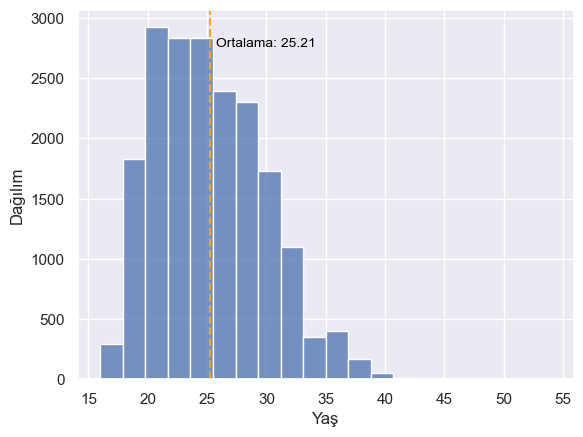

In [15]:
sns.set()
fig, ax = plt.subplots()
ortalama_yas = df["age"].mean()
sns.histplot(data=df["age"], bins = 20, ax=ax)

ax.set(xlabel="Yaş", ylabel="Dağılım")
ax.axvline(ortalama_yas, linestyle="--", color="orange")

ax.text(ortalama_yas+0.5, ax.get_ylim()[1]*0.9,  f"Ortalama: {ortalama_yas:.2f}",color="black",fontsize=10)

plt.show()


Grafikten de görüldüğü üzere yaş dağılımı sağa çarpık bir dağılım izlemekte, oyuncuların çoğunluğu 20 ile 25 yaş aralığında dağılmış.Birçok oyuncunun da ortalamanın üzerinde yaşta olduğunu görebiliriz.


---

##### En Çok Oyuncusu Olan 15 Ülke

* Tablo Halinde Görelim
* Bar Grafiği ile Görselleştirelim

                     oyuncu_sayısı  ortalama_oyuncu_puanı
nationality_name                                         
England                       1719              63.934846
Germany                       1214              65.631796
Spain                         1086              69.563536
France                         980              67.543878
Argentina                      960              68.721875
Brazil                         897              70.851728
Japan                          546              64.406593
Netherlands                    439              67.460137
United States                  413              63.191283
Poland                         403              63.119107
China PR                       385              58.319481
Sweden                         385              63.374026
Norway                         379              63.343008
Republic of Ireland            374              60.240642
Portugal                       373              69.726542





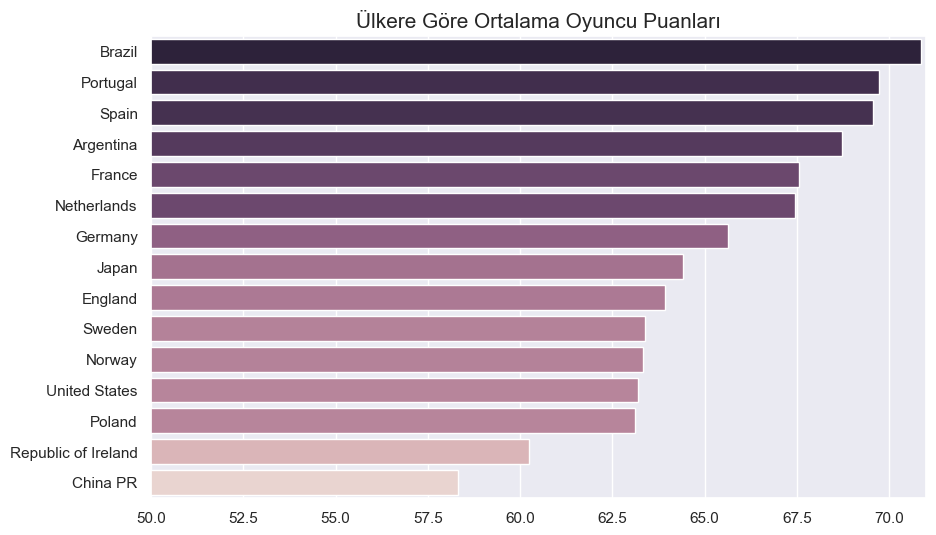

In [19]:
ulkeler_puan_ort = df.groupby("nationality_name")[["overall"]].agg(oyuncu_sayısı = ("overall", "count"),
                                               ortalama_oyuncu_puanı = ("overall", "mean")).sort_values(by="oyuncu_sayısı", ascending=False).head(15)

print(ulkeler_puan_ort.sort_values(by="oyuncu_sayısı", ascending = False))
print("\n\n")
#grafiği çizelim

sns.set()
plt.figure(figsize=(10,6))
sns.barplot(data = ulkeler_puan_ort.sort_values(by="ortalama_oyuncu_puanı", ascending=False) 
            , x="ortalama_oyuncu_puanı", y="nationality_name", hue="ortalama_oyuncu_puanı", legend=False)

plt.xlabel("")
plt.ylabel("")
plt.xlim(50,71)
plt.title("Ülkere Göre Ortalama Oyuncu Puanları", fontsize = 15)
plt.show()


Bu bar grafiği ile ülkere ait ortalama oyuncu puanlarını görebiliyoruz. Futbola kattığı birçok yıldız ile Brezilya ortalama puanda birinci konumunda.

---

#### Liglerin Enleri

* En Pahalı Ligler
* Ortalama Skoru En Yüksek Ligler
* Liglerdeki Oyuncuların Değerlerinin İstatistiksel Dağılımını Kutu Grafiği ile Görelim

En Pahalı Ligleri Görelim

In [24]:
pd.set_option("display.float_format", "{:,.0f}".format)

en_pahalı_ligler = df.groupby("league_name")[["value_eur", "short_name", "club_name"]].apply(lambda g: pd.Series({
    "Toplam_Değer": g["value_eur"].sum(),
    "Ort_Oyuncu_Değeri": g["value_eur"].mean(),
    "Maks": g["value_eur"].max(),
    "Oyuncu": g.loc[g["value_eur"].idxmax(), "short_name"],
    "en": g.loc[g["value_eur"].idxmax(), "club_name"]
})).sort_values(by="Toplam_Değer", ascending=False).head(12)

en_pahalı_ligler

,Toplam_Değer,Ort_Oyuncu_Değeri,Maks,Oyuncu,en
league_name,,,,,
English Premier League,"9,148,980,000","14,032,178","129,500,000",H. Kane,Tottenham Hotspur
Spain Primera Division,"7,282,200,000","11,504,265","119,500,000",F. de Jong,FC Barcelona
Italian Serie A,"5,308,695,000","9,429,298","93,000,000",P. Dybala,Juventus
German 1. Bundesliga,"4,763,380,000","8,644,973","137,500,000",E. Haaland,Borussia Dortmund
French Ligue 1,"4,239,495,000","7,347,478","194,000,000",K. Mbappé,Paris Saint-Germain
Portuguese Liga ZON SAGRES,"2,015,385,000","3,990,861","51,500,000",Pedro Gonçalves,Sporting CP
Holland Eredivisie,"1,454,925,000","2,957,165","39,500,000",Antony,Ajax
Argentina Primera División,"1,430,055,000","1,975,214","22,000,000",N. De la Cruz,River Plate
Campeonato Brasileiro Série A,"1,394,130,000","3,872,583","35,500,000",Ronaldo Cabrais,Grêmio


Dikkatimi Çekenler !!!

İngiliz Premier Ligi 9 milyar Euro'luk inanılmaz bir büyüklüğe sahip. 

Neredeyse tek başına bir takım değeri taşıyan Mbappe ise Fransa ile 5. sırada. 

Türkiyemizin Süper Ligi 1 milyarlık toplam değeri ile 12.sırada (Ülkemizin listeye dahil olması için ilk 12 lig baz alınmıştır).

##### En Pahalı Kulüpleri Görelim

In [27]:
kulupler_piyasa_degeri = (
    df.groupby("club_name")[["value_eur", "overall", "short_name","player_positions"]]
      .apply(lambda g: pd.Series({
          "Toplam_Deger": g["value_eur"].sum(),
          "Ort_Skor": g["overall"].mean(),
          "En_Yuksek": g["overall"].max(),
          "En_Yuksek_Oyuncu": g.loc[g["overall"].idxmax(), "short_name"],
          "Piyasa_Degeri": g.loc[g["overall"].idxmax(), "value_eur"],
          "Pozisyon": g.loc[g["overall"].idxmax(), "player_positions"]
      }))
      .sort_values("Toplam_Deger", ascending=False)
      .head(15)
)

kulupler_piyasa_degeri

,Toplam_Deger,Ort_Skor,En_Yuksek,En_Yuksek_Oyuncu,Piyasa_Degeri,Pozisyon
club_name,,,,,,
Manchester City,"1,299,510,000",77,91,K. De Bruyne,"125,500,000","CM, CAM"
Paris Saint-Germain,"1,227,400,000",79,93,L. Messi,"78,000,000","RW, ST, CF"
Liverpool,"1,046,375,000",76,89,V. van Dijk,"86,000,000",CB
Manchester United,"1,008,730,000",78,91,Cristiano Ronaldo,"45,000,000","ST, LW"
Real Madrid CF,"987,575,000",78,89,K. Benzema,"66,000,000","CF, ST"
FC Bayern München,"969,475,000",78,92,R. Lewandowski,"119,500,000",ST
Atlético de Madrid,"952,475,000",77,91,J. Oblak,"112,000,000",GK
Chelsea,"934,150,000",76,90,N. Kanté,"100,000,000","CDM, CM"
FC Barcelona,"834,300,000",77,90,M. ter Stegen,"99,000,000",GK


En pahalı ligin en pahalı kulübü: Manchester City !

___

##### En iyi 5 Ligdeki Oyuncuların Değerlerinin İstatistiksel Dağılımını Kutu Grafiği ile Görelim

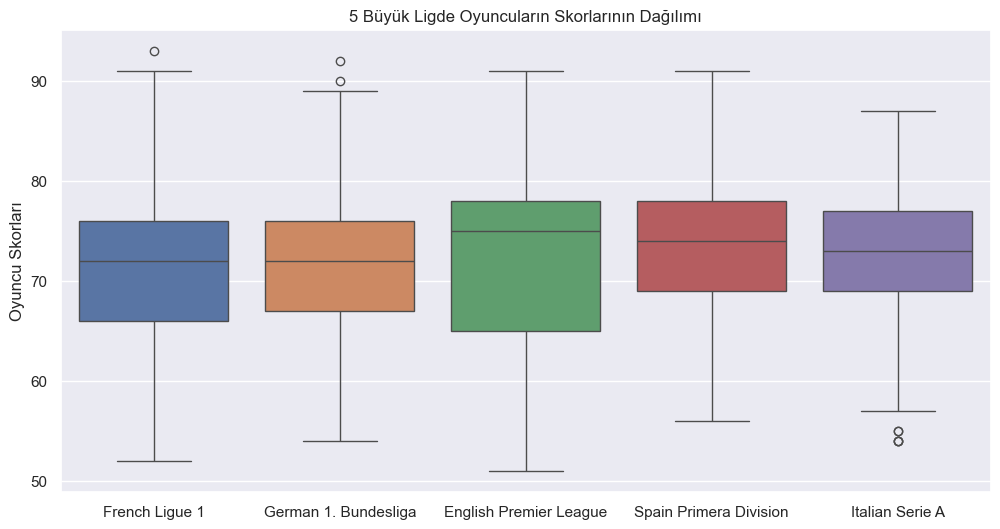

In [31]:
en_iyi_ligler = ["English Premier League", "Spain Primera Division", "Italian Serie A", "German 1. Bundesliga", "French Ligue 1"]

df_en_iyi = df[df["league_name"].isin(en_iyi_ligler)]

plt.figure(figsize=(12,6))
sns.boxplot(data=df_en_iyi, x="league_name", y="overall", hue="league_name")
plt.xlabel("")
plt.ylabel("Oyuncu Skorları")
plt.title("5 Büyük Ligde Oyuncuların Skorlarının Dağılımı")
plt.show()

Bu 5 ligi incelediğimizde hepsinin oyuncu skorları için medyan değerinin 70 üzerinde olduğunu söyleyebiliriz.

Fransa ve Almanya'da birkaç süper yıldız olduğunu söyleyebiliriz, outlier değerlere sahipler.

İngiltere ise en pahalı lig olmasının hakkını vererek medyan değerini diğer liglerden daha yukarda tutmuş. Yani ortalama oyuncu kalitesi diğer liglere göre daha yüksek. Kutu grafiğinden de görülebileceği gibi sola çarpık bir dağılım göstererek skoru yüksek oyuncunun daha fazla olduğu bir lig.



#### KMeans Kullanarak Kümeleme

In [34]:
#Veriyi hazırlayalım
forvet_pozisyonlari = ["ST", "CF", "LW", "RW", "LF", "RF"]

df_forvet = df[df["player_positions"].str.contains("|".join(forvet_pozisyonlari))]
df_forvet = df_forvet[['short_name','pace', 'shooting', 'dribbling', 'physic']]

#Standardize edelim
scaler = StandardScaler()
df_forvet[['pace_s', 'shooting_s', 'dribbling_s', 'physic_s']] =  scaler.fit_transform(df_forvet[['pace', 'shooting', 'dribbling', 'physic']])

# KMeans modelini uygulayalım
x_scaled = df_forvet[["pace_s", "shooting_s", "dribbling_s", "physic_s"]]
kmeans = KMeans(n_clusters=3, random_state=42)
df_forvet["cluster"] = kmeans.fit_predict(x_scaled)

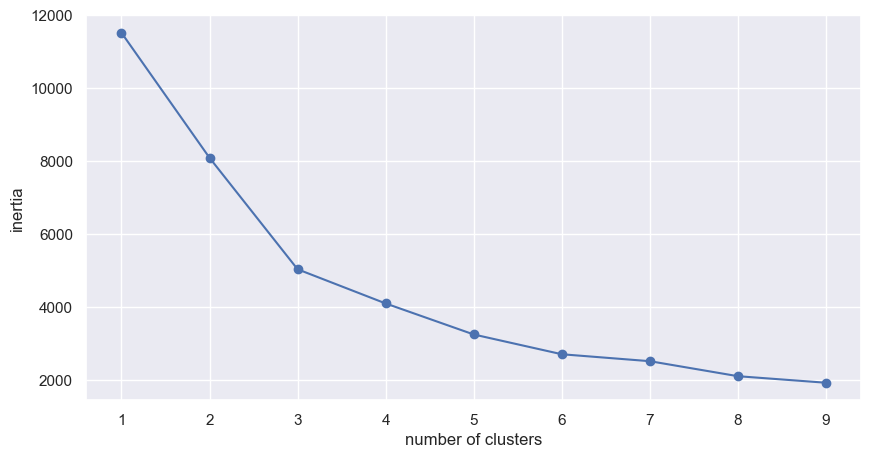

In [35]:
### Uygun Küme Sayısını Elbow Plot ile belirleyelim
def optimise_k_means(data, max_k):
    means=[]
    inertias=[]

    for k in range(1, max_k):
        kmeans= KMeans(n_clusters = k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, "o-")
    plt.xlabel("number of clusters")
    plt.ylabel("inertia")
    plt.grid(True)
    plt.show()

optimise_k_means(df_forvet[["pace_s", "shooting_s"]], 10)

Inertia: küme içi noktaların merkez noktasına olan uzaklıklarının karelerinin toplamı 

Inertia değerinin kırıldığı noktayı küme sayısı olarak seçelim

Burda küme sayısının 1'den 3'e doğru büyük bir eğimle giderken 3 değerinde bir kırılıma uğradığını görüyoruz. Yani 3 kümeye kadar inertia hızlı düşüyor, 3’ten sonra azalma yavaşlıyor bu yüzden optimal küme sayısı 3 olarak seçilebilir.

In [37]:
### Clusterları gruplayarak görelim
df_forvet.groupby("cluster")[["pace","shooting","dribbling","physic"]].mean()

,pace,shooting,dribbling,physic
cluster,,,,
0,80,68,73,65
1,73,52,61,56
2,63,65,63,70


#### Yorumlar
Yaptığımız kümeleme sonucunda forvet oyuncularımız için 3 adet küme elde ettik. Yapabileceğimiz yorumlar:

* Cluster 0 – “Hızlı ve Teknik Forvetler -> Bu grup büyük ihtimalle kanat forvetler (ör. hızlı ve teknik oyuncular: Mbappé tarzı)

* Cluster 1 – “Zayıf Forvetler / Genç Oyuncular -> Muhtemelen alt lig oyuncuları, gençler veya düşük rating’li forvetler


* Cluster 2 – “Güçlü Santraforlar” -> Bu grup klasik pivot santraforlar (ör. Lewandowski tarzı ama biraz daha düşük seviye).


#### Kümelerimizi Grafikte Görelim

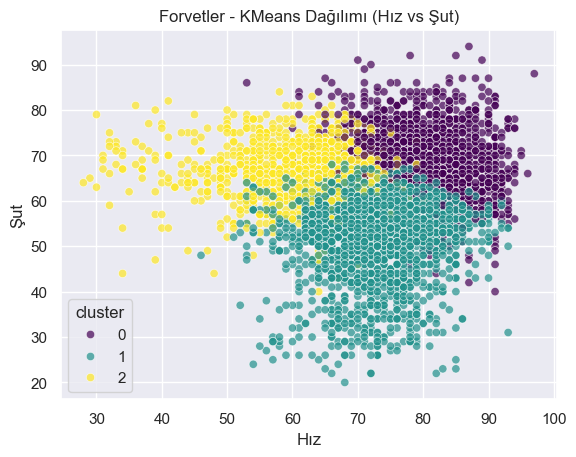

In [40]:
sns.scatterplot(
    data=df_forvet, x="pace", y="shooting", hue="cluster", palette="viridis", alpha=0.7
)
plt.title("Forvetler - KMeans Dağılımı (Hız vs Şut)")
plt.xlabel("Hız")
plt.ylabel("Şut")
plt.show()

* Mor (cluster 0): Pace yüksek, shooting de yüksek → yani hızlı + şutör forvetler (kanatlar & golcüler).

* Yeşil (cluster 1): Pace orta, shooting daha düşük → muhtemelen ağır ama farklı özelliklere sahip forvetler (target man, pivot oyuncular).

* Sarı (cluster 2): Pace düşük/orta, shooting yüksek → yani hızlı olmayan ama bitiriciliği yüksek klasik forvetler.

Şimdi Bütün Değişkenlerin Birbirleri Arasında Nasıl Kümelendiklerini Görelim

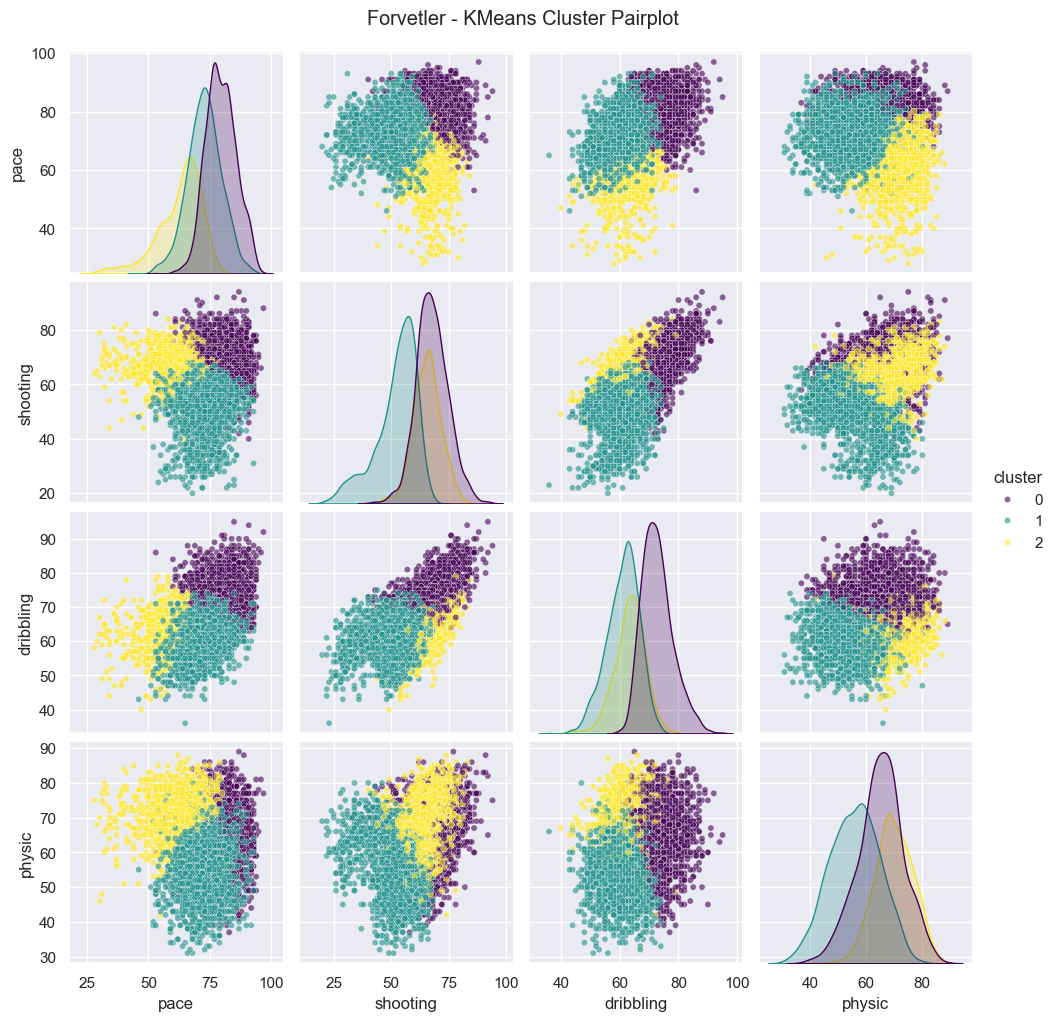

In [43]:
sns.pairplot(
    df_forvet,
    vars=["pace","shooting","dribbling","physic"],
    hue="cluster",
    palette="viridis",
    plot_kws={"alpha":0.6, "s":20}
)

plt.suptitle("Forvetler - KMeans Cluster Pairplot", y=1.02)
plt.show()

---

### Genç Yıldız Adaylarını Görelim ve İnceleyelim

* Genç Yıldızları Filtreleyip Yeni Bir DataFrame Oluşturalım
* Hangi Oyuncular En Fazla Gelişime Aday Görelim
* Yaş Gruplarına Göre Ortalama Puanlar - Kutu Grafiği
* Piyasa Değeri En Yüksek Genç Yıldız
* Genç Yıldızların Liglere Göre Toplam Piyasa Değeri
* Mevkisel Analiz - Hangi Mevkide Daha Fazla Genç Yıldız Var ? 

Öncelikle DataFrame'e Pozisyon Gruplarını Etiketleyecek Şekilde Yeni Bir Sütun Ekleyelim

In [47]:
POS_MAP = {
    "Forvet": {"ST","CF","LF","RF","LW","RW"},
    "Orta Saha": {"CAM","CM","LM","RM","CDM"},
    "Defans": {"CB","LB","RB","LWB","RWB"},
    "Kaleci": {"GK"},
}

def pos_kategori_any(pos_str):
    toks = {p.strip() for p in str(pos_str).split(",")}
    for kategori, positions in POS_MAP.items():
        if toks & positions:  
            return kategori
    return "Diğer"

df["pos_genel"] = df["player_positions"].apply(pos_kategori_any)

df[["player_positions", "pos_genel"]]

,player_positions,pos_genel
0,"RW, ST, CF",Forvet
1,ST,Forvet
2,"ST, LW",Forvet
3,"LW, CAM",Forvet
4,"CM, CAM",Orta Saha
...,...,...
19234,CDM,Orta Saha
19235,CM,Orta Saha
19236,CM,Orta Saha
19237,ST,Forvet


##### Yeni DataFrame

In [49]:
genc_yildiz = df[(df["age"] <= 21) & (df["potential"] >= 85)].copy().reset_index()
genc_yildiz[["short_name", "club_name", "age", "overall", "potential", "value_eur", "wage_eur"]]

,short_name,club_name,age,overall,potential,value_eur,wage_eur
0,E. Haaland,Borussia Dortmund,20,88,93,"137,500,000","110,000"
1,J. Sancho,Manchester United,21,87,91,"116,500,000","150,000"
2,M. de Ligt,Juventus,21,85,90,"75,000,000","81,000"
3,P. Foden,Manchester City,21,84,92,"94,500,000","125,000"
4,João Félix,Atlético de Madrid,21,83,91,"82,000,000","61,000"
...,...,...,...,...,...,...,...
115,Kayky,Manchester City,18,66,87,"2,700,000","12,000"
116,Gavi,FC Barcelona,16,66,85,"2,100,000","4,000"
117,L. Delap,Manchester City,18,64,85,"1,900,000","9,000"
118,D. Scarlett,Tottenham Hotspur,17,63,86,"1,500,000","3,000"


* 21 yaş altında ve potansiyeli 85'in üstünde olan genç yıldız adaylarını filtreleyerek yeni bir dataframe oluşturduk.

* Hem potansiyel değeriyle hem de piyasa değeriyle listenin başında: Haaland Haaland !!

##### En Yüksek Gelişim Farkına Sahip Oyuncular

In [52]:
genc_yildiz["gelisim_farkı"] = (genc_yildiz["potential"] - genc_yildiz["overall"])
genc_yildiz[["short_name","age","overall","potential","gelisim_farkı", "player_positions", "pos_genel"]].sort_values(by="gelisim_farkı", ascending = False).head(15)


,short_name,age,overall,potential,gelisim_farkı,player_positions,pos_genel
119,R. Lavia,17,62,85,23,CDM,Orta Saha
118,D. Scarlett,17,63,86,23,ST,Forvet
117,L. Delap,18,64,85,21,ST,Forvet
115,Kayky,18,66,87,21,RW,Forvet
114,C. Clark,18,66,86,20,"CAM, CM",Orta Saha
116,Gavi,16,66,85,19,CM,Orta Saha
113,F. Carvalho,18,67,86,19,CAM,Orta Saha
109,L. Stergiou,19,67,86,19,CB,Defans
112,M. Juwara,19,67,85,18,ST,Forvet
111,Talles Magno,19,67,85,18,"LM, CF",Forvet


Gavi 16 yaşına rağmen 85'lik potansiyeli ile ilgi çekiyor.

#### Yaş Grupları Oluşturalım ve Oyuncuların Ortalama Puanlarının Dağılımını Görelim

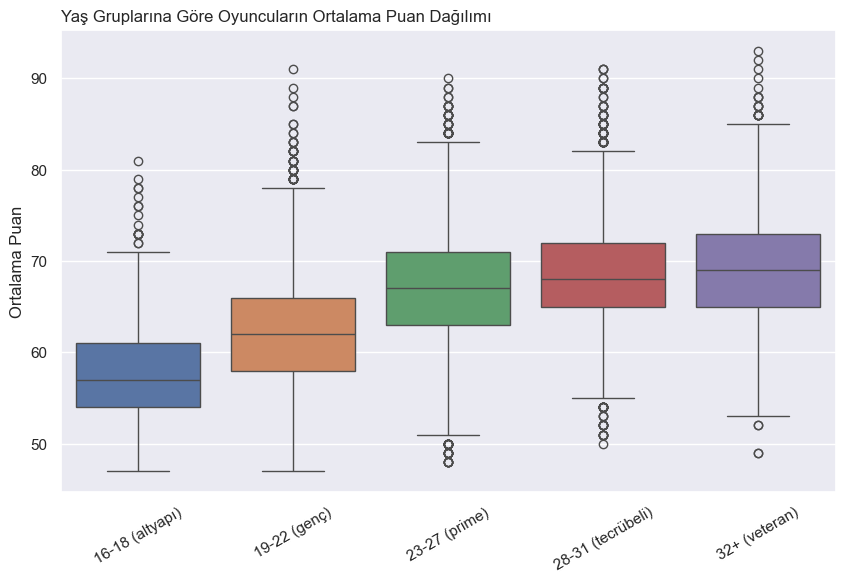

In [55]:
bins = [16,18,22,27,31, df["age"].max()]
labels = ["16-18 (altyapı)", "19-22 (genç)", "23-27 (prime)", "28-31 (tecrübeli)", "32+ (veteran)"]

df["yas_grubu"] = pd.cut(df["age"], bins=bins, labels=labels, right=True, include_lowest=True)

sns.set()
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="yas_grubu", y="overall", hue="yas_grubu")
plt.xticks(rotation=30)
plt.xlabel("")
plt.ylabel("Ortalama Puan")
plt.title("Yaş Gruplarına Göre Oyuncuların Ortalama Puan Dağılımı", loc="left")
plt.show()

* Altyapı grubu beklenileceği üzere en düşük ortalama puana sahip ancak bazı outlier değerleri ,yıldız adaylarını, içeriyor.

* Genç yaş grubunda puan biraz daha gelişmiş ve evet yıldız adayları burada da var elbette.

* Prime dönem... Birçok oyuncunun parladığı birçoğunun ise ışığının söndüğü dönem. Hem yüksek puanlı hem de düşük puanlı outlier değerleri görüyoruz.

* Tecrübeli yaşlar bazılarının futbolcunun futbolu bıraktığı bazılarının ise süper star olma yolunda ilerlediği yaşlar. Birçok outlier görebiliyoruz tekrardan.

* Futbol için son mu ? Hiç sanmam çünkü veteran grubu ortalama olarak diğer tüm gruplardan yukarıda. Efsaneler burada.


Özetlersek:

Veriler, yaş ilerledikçe oyuncuların ortalama skorlarının yükseldiğini, ancak prime sonrası dönemde varyansın arttığını gösteriyor. Bu da futbolcularda kariyer yollarının farklılaşmaya başladığını ortaya koyuyor: bazıları zirvede kalırken bazıları düşüşe geçiyor. Veteran grubu ise yüksek ortalama skoruyla kariyerin son döneminde bile üst düzey performans gösterebilen efsaneleri barındırıyor.

#### En Değerli Genç Kim ? / Genç Yıldızların Liglere Göre Toplam Piyasa Değerleri

      Piyasa Değeri En Yüksek Genç Yıldız: E. Haaland




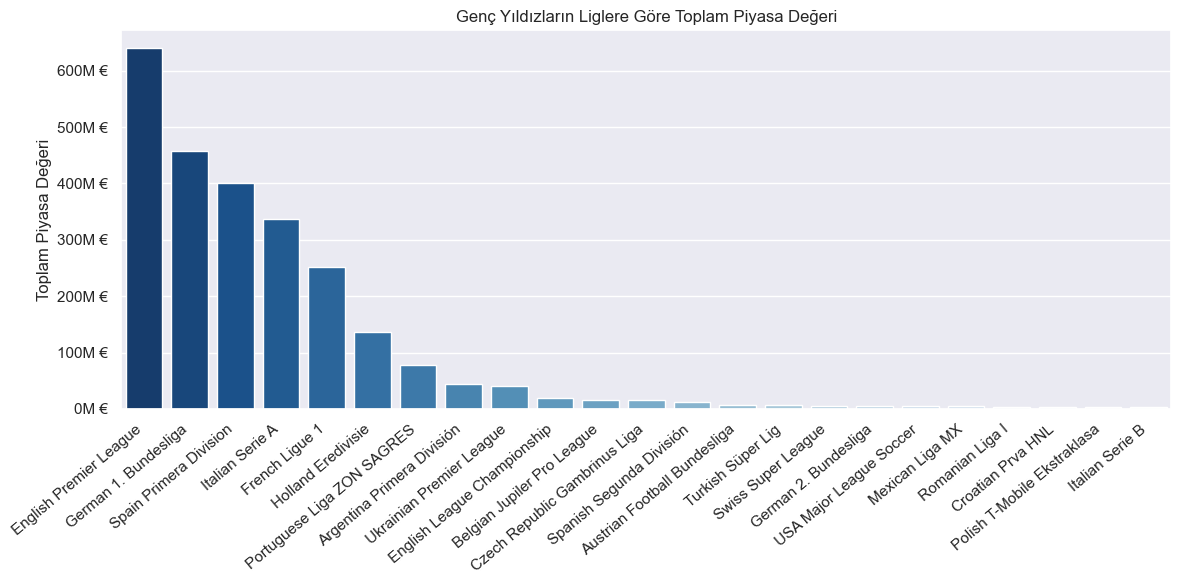

In [58]:
en_degerli = genc_yildiz[genc_yildiz["value_eur"]==genc_yildiz["value_eur"].max()]
print(f"      Piyasa Değeri En Yüksek Genç Yıldız: {en_degerli.loc[0, "short_name"]}"),
print("\n")


toplam_deg = genc_yildiz.groupby("league_name")[["value_eur"]].agg(toplam = ("value_eur", "sum"))
toplam_deg_sorted = toplam_deg.sort_values(by="toplam", ascending = False).reset_index()

sns.set()
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=toplam_deg_sorted,
    x="league_name",
    y="toplam",
    hue="league_name",
    palette="Blues_r"
)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1e6)}M €'))
plt.xticks(rotation = 40, ha="right")
plt.title("Genç Yıldızların Liglere Göre Toplam Piyasa Değeri")
plt.ylabel("Toplam Piyasa Değeri")
plt.xlabel("")
plt.tight_layout()
plt.show()



Genç yıldızların bulundukları liglere göre toplam piyasa değerleri.

* Premier Lig hem en fazla oyuncu sayısına hem en fazla piyasa değerine hem de en pahalı genç yıldızları bünyesinde barındırıyor. Gerçekten de dünya futbolunun zirvesinde bulunuyor diyebileceğimiz bir lig.

* Premier Lig'in hemen ardından Bundesliga geliyor ancak toplam değerde yaklaşık 150 milyon euroluk bir fark görüyoruz.



##### Mevkisel Analiz - Hangi Mevkide Daha Fazla Genç Yıldız Var ?

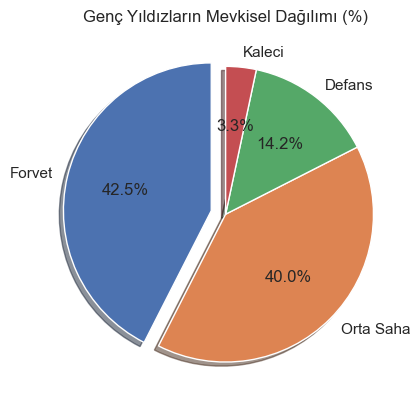

In [61]:
poz_counts_yildiz = genc_yildiz["pos_genel"].value_counts(normalize=True) * 100

explode = (0.1, 0, 0, 0)  
fig, ax = plt.subplots()
ax.pie(poz_counts_yildiz, explode = explode, labels=poz_counts_yildiz.index, autopct="%.1f%%", startangle=90, shadow=True)
plt.title("Genç Yıldızların Mevkisel Dağılımı (%)")
plt.show()



Hangi mevkide daha fazla genç yıldız var görüyoruz.

En büyük payı 45.8%'lik yüzde ile orta saha oyuncuları almış, hemen arkasından ise forvet oyuncuları.

----

### Hangi Pozisyon Hangi Ligde Daha Yüksek Ortalama Skora Sahip - Heatmap ile Görselleştirme

In [65]:
#1)En Pahalı Ligleri Bulalım 
pahalı_ligler_isimler = df.groupby("league_name")[["value_eur"]].sum().sort_values(by="value_eur", ascending=False).head(12)
print(pahalı_ligler_isimler)
print("\n\n")


#2) sadece bu liglerde pozisyon gruplarına göre ortalama oyuncu skorunu alalım
ligler_isim_list = pahalı_ligler_isimler.index.tolist()
en_pahalı_lig_df = df[df["league_name"].isin(ligler_isim_list)]

print(en_pahalı_lig_df.head(1))

                                  value_eur
league_name                                
English Premier League        9,148,980,000
Spain Primera Division        7,282,200,000
Italian Serie A               5,308,695,000
German 1. Bundesliga          4,763,380,000
French Ligue 1                4,239,495,000
Portuguese Liga ZON SAGRES    2,015,385,000
Holland Eredivisie            1,454,925,000
Argentina Primera División    1,430,055,000
Campeonato Brasileiro Série A 1,394,130,000
English League Championship   1,261,620,000
USA Major League Soccer       1,252,645,000
Turkish Süper Lig             1,210,865,000



   sofifa_id                                         player_url short_name  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   L. Messi   

                        long_name player_positions  overall  potential  \
0  Lionel Andrés Messi Cuccittini       RW, ST, CF       93         93   

   value_eur  wage_eur  age         dob  height_cm  weight_kg  club_team_id

In [66]:
#3] pivot tablo haline getirelim
pivot = (en_pahalı_lig_df.pivot_table(index="league_name", columns="pos_genel",values="overall",aggfunc="mean"))

col_order = ["Forvet","Orta Saha","Defans","Kaleci"]
pivot = pivot.reindex(columns=col_order)

pivot = pivot.loc[ligler_isim_list]

pivot


pos_genel,Forvet,Orta Saha,Defans,Kaleci
league_name,,,,
English Premier League,74,72,72,72
Spain Primera Division,74,73,73,72
Italian Serie A,74,72,73,72
German 1. Bundesliga,72,71,72,69
French Ligue 1,72,71,71,69
Portuguese Liga ZON SAGRES,69,69,69,68
Holland Eredivisie,67,67,67,65
Argentina Primera División,68,67,68,67
Campeonato Brasileiro Série A,71,72,72,72


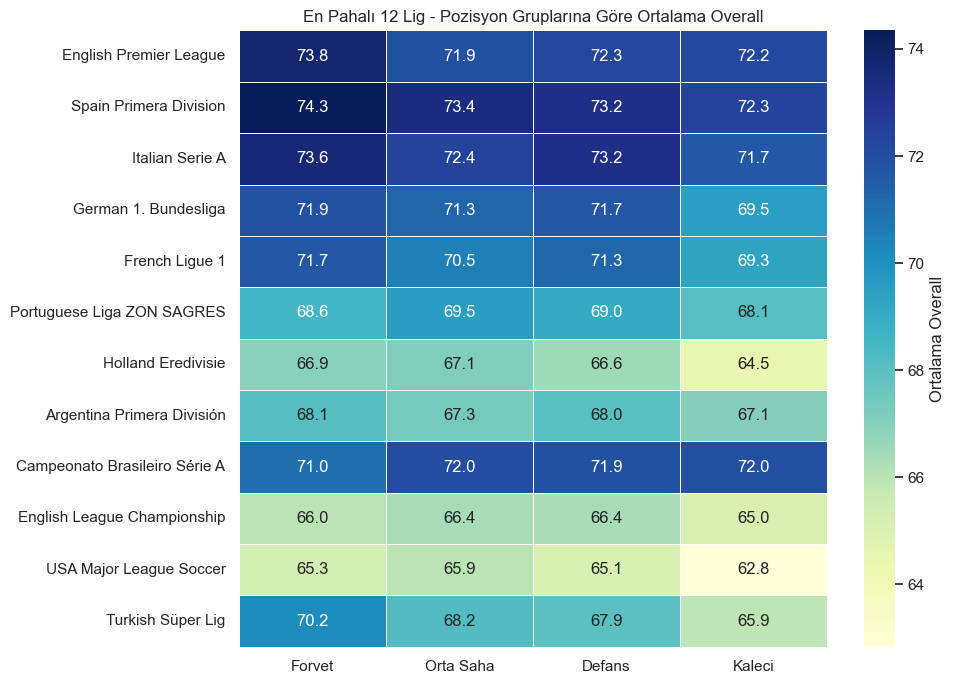

In [67]:
#4) ***** Heatmap çizelim *****
plt.figure(figsize=(10,7))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={"label":"Ortalama Overall"})
plt.title("En Pahalı 12 Lig - Pozisyon Gruplarına Göre Ortalama Overall")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

* İngiltere Premier ligi tekrar kalitesini konuşturarak bütün pozisyon gruplarında yüksek ortalamaya sahip. 

* Gene aynı şekilde diğer büyük ligler de (İspanya, İtalya, Almanya, Fransa) kalan liglere göre yüksek ortalamaya sahipler

* Evet büyük ligler yüksek ortalamaya sahip ancak Brezilya ligi de alt sıradaki liglere kıyasla yüksek ortalaması ile ben buradayım diyor adeta.

* Türkiyemizin Süper ligi ise en yüksek ortalamayı forvet pozisyonlarında gösterirken Amerika, Hollanda, Arjantin gibi liglerden daha iyi performans sergiliyor.
